In [14]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import pickle
import os

path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Simulationsergebnisse\Results_7_WT_150k_CS3.csv"
df = pd.read_csv(path)

In [16]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Soc_start,Soc_end,Charge_start,Charge_end
0,0.1,1,1,2,360.0,24,362.0,2.0,1.18,433,100.0,99.7,362.0,364.0
1,0.2,2,2,3,795.0,53,796.0,1.0,0.33,306,100.0,99.9,796.0,797.0
2,0.3,3,3,1,1102.0,73,1103.0,1.0,0.29,922,100.0,99.9,1103.0,1104.0
3,1.1,1,1,3,801.0,53,811.0,10.0,5.54,100,100.0,98.6,811.0,828.0
4,1.2,2,3,1,911.0,61,923.0,12.0,6.63,1070,100.0,98.4,923.0,943.0


## Reduzieren der Daten auf erste Wege des Tages

In [17]:
filt = df["Trip_no"] == 1
first_trip = df[filt]["Departure"]

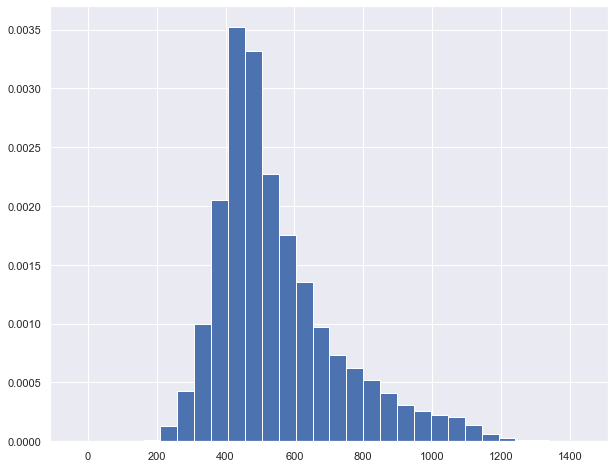

In [18]:
# Histogramm der Abfahrtszeiten der ersten Trips
sns.set()
plt.figure(figsize=(10,8))
count, bins, ignored = plt.hist(first_trip, bins = 30, density=True)

## Kernel Density Estimation Modell über Simulationsergebnis

In [19]:
from sklearn.neighbors import KernelDensity

In [20]:
x = np.linspace(-50, 1450, 1000)
model_data = np.array(first_trip)

In [21]:
# Erstellen Kernel Density Estimation Modell mit Bandbreite 18
kde_model = KernelDensity(bandwidth=18)
# Trainieren des Modells mit den Daten (np.newaxis transformiert den Reihen- zu Spaltenvektor) 
kde_model.fit(model_data[:, np.newaxis])
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
kde_log_pdf = kde_model.score_samples(x[:, np.newaxis])
kde_pdf = np.exp(kde_log_pdf)

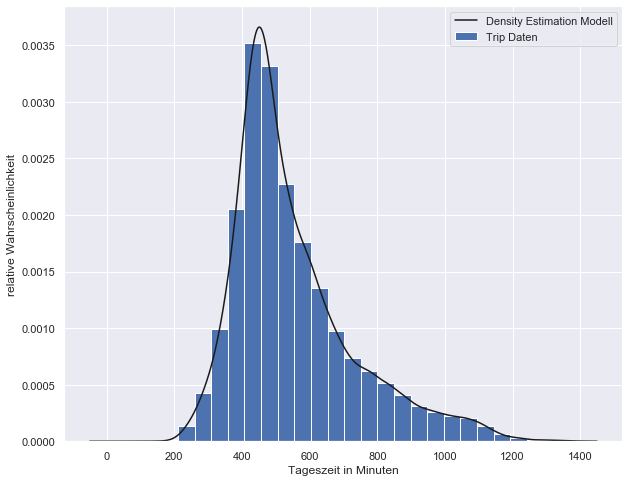

In [22]:
# Plottten des Modells
plt.figure(figsize=(10,8))
plt.hist(first_trip, bins=30, density=True);
plt.plot(x, kde_pdf, '-k');
labels = ["Density Estimation Modell", "Trip Daten"]
plt.legend(labels);
plt.xlabel("Tageszeit in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");

## Vergleich mit Ausgangsdaten

In [23]:
# Laden der Liste aller ersten Fahren und des darauf basierenden KDE Modells
orig_trips_path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Liste_Initiale_Abfahrtszeit_Werktag.pickle"
orig_model_path = r"C:\Users\thoma\Desktop\ev-modelling-repo\Datenauswertung\Werktag\Simulationsdaten\Modell_Initiale_Abfahrtszeit_Werktag.pickle"

first_trips_orig = pickle.load(open(orig_trips_path, "rb"))
kde_model_orig = pickle.load(open(orig_model_path, "rb"))

In [24]:
# übertragen in visaulisierbare Wahrscheinlichkeitsdichtefunktion
kde_log_pdf_orig = kde_model_orig.score_samples(x[:, np.newaxis])
kde_pdf_orig = np.exp(kde_log_pdf_orig)

## Plotten des Vergleichs

Text(0.5, 1.0, 'Vergleich der Wahrscheinlichkeitsdichtefunktion von Ausgangsdaten und Simulationsergebnis')

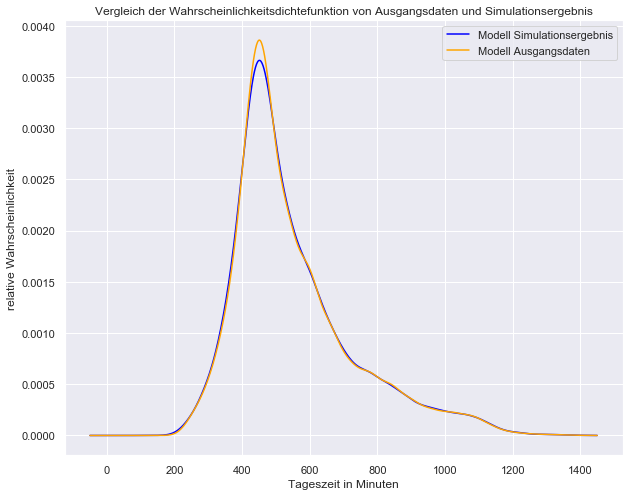

In [25]:
# Plottten der PDF
plt.figure(figsize=(10,8))
plt.plot(x, kde_pdf, '-k', label="Modell Simulationsergebnis", color="blue");
plt.plot(x, kde_pdf_orig, '-k', label="Modell Ausgangsdaten", color="orange");
plt.legend();
plt.xlabel("Tageszeit in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");
plt.title("Vergleich der Wahrscheinlichkeitsdichtefunktion von Ausgangsdaten und Simulationsergebnis")

Text(0.5, 1.0, 'Vergleich der Histogramme von Ausgangsdaten und Simulationsergebnis')

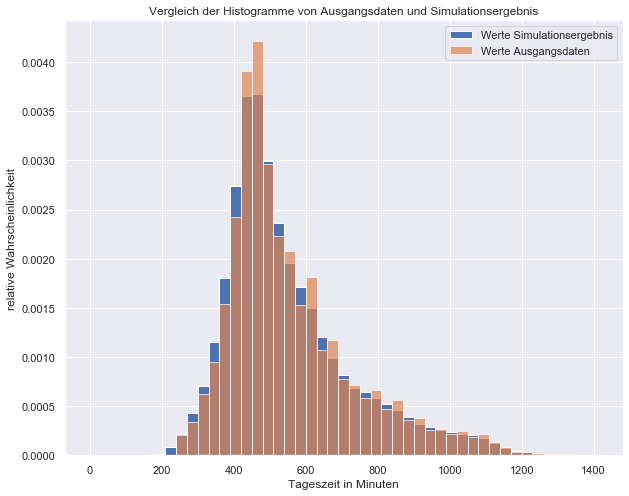

In [26]:
# Plottten der Histogramme
plt.figure(figsize=(10,8))
plt.hist(first_trip, label="Werte Simulationsergebnis", bins=range(0, int(max(first_trip)), 30), density=True);
plt.hist(first_trips_orig, label="Werte Ausgangsdaten", bins=range(0, int(max(first_trip)), 30), alpha=0.7, density=True);
plt.legend();
plt.xlabel("Tageszeit in Minuten");
plt.ylabel("relative Wahrscheinlichkeit");
plt.title("Vergleich der Histogramme von Ausgangsdaten und Simulationsergebnis")